In [23]:
%matplotlib notebook

In [24]:
# Dependencies
import openweathermapy.core as owm
# Dependencies
import requests
import random
#from config import api_key
from config import gkey
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta


In [25]:
Jan = pd.read_csv("2018Data\RideShare_Data_201801.csv", parse_dates=[0], low_memory=False)
Feb = pd.read_csv("2018Data\RideShare_Data_201802.csv", parse_dates=[0], low_memory=False)
Mar = pd.read_csv("2018Data\RideShare_Data_201803.csv", parse_dates=[0], low_memory=False)
Apr = pd.read_csv("2018Data\RideShare_Data_201804.csv", parse_dates=[0], low_memory=False)
May = pd.read_csv("2018Data\RideShare_Data_201805.csv", parse_dates=[0], low_memory=False)
Jun = pd.read_csv("2018Data\RideShare_Data_201806.csv", parse_dates=[0], low_memory=False)
Jul = pd.read_csv("2018Data\RideShare_Data_201807.csv", parse_dates=[0], low_memory=False)
Aug = pd.read_csv("2018Data\RideShare_Data_201808.csv", parse_dates=[0], low_memory=False)
Sep = pd.read_csv("2018Data\RideShare_Data_201809.csv", parse_dates=[0], low_memory=False)
Oct = pd.read_csv("2018Data\RideShare_Data_201810.csv", parse_dates=[0], low_memory=False)
Nov = pd.read_csv("2018Data\RideShare_Data_201811.csv", parse_dates=[0], low_memory=False)
Dec = pd.read_csv("2018Data\RideShare_Data_201812.csv", parse_dates=[0], low_memory=False)
src_df = pd.concat([Jan, Feb, Mar, Apr, May, Jun, Jul, Aug, Sep, Oct, Nov, Dec])



In [26]:
src_df["week_day"] =pd.to_datetime(src_df["Pickup_DateTime"]).dt.dayofweek

src_df.head()
src_df["week_day"].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)

In [27]:
def fdayofweek(x):
    return {
        0:'Monday',
        1:'Tuesday',
        2:'Wednesday',
        3:'Thrusday',
        4:'Friday',
        5:'Saturday',
        6:'Sunday',
     }.get(x, "NA")



src_df["week_day_name"]= src_df["week_day"].apply(fdayofweek)
src_df["week_day_name"].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thrusday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [28]:
src_df["hours"] =pd.to_datetime(src_df["Pickup_DateTime"]).dt.hour
src_df["hours"]

# Create bins in which to place values based upon TED Talk views
bins = [-1,6,12,18,23]
       

# Create labels for these bins
group_labels = ['Night','Morning','Afternoon','Evening']

In [29]:
src_df["hours_group"]= pd.cut(src_df["hours"], bins, labels=group_labels)


In [30]:
src_df['weather_main'] = src_df['weather_main'].astype(str)
weather_grp_df = src_df.groupby(src_df['weather_main'])
weather_grp_df.head()


,#,Pickup_DateTime,DropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Pickup_City,Dropoff_City,Pickup_ZipCode,Dropoff_ZipCode,...,Temp,humidity,wind_speed,weather_id,weather_main,weather_description,week_day,week_day_name,hours,hours_group
0,0,2018-01-01 00:00:15,2018-01-01 00:23:43,90.0,42.0,0.0,"Flatiron, Manhattan","Central Harlem North, Manhattan",10024.0,10024.0,...,11,43.0,4.0,800.0,Clear,sky is clear,0,Monday,0,Night
1,1,2018-01-01 00:00:56,2018-01-01 00:06:41,170.0,233.0,0.0,"Murray Hill, Manhattan","UN/Turtle Bay South, Manhattan",10024.0,10024.0,...,11,43.0,4.0,800.0,Clear,sky is clear,0,Monday,0,Night
2,2,2018-01-01 00:03:12,2018-01-01 00:25:04,188.0,210.0,1.0,"Prospect-Lefferts Gardens, Brooklyn","Sheepshead Bay, Brooklyn",11216.0,11216.0,...,11,43.0,4.0,800.0,Clear,sky is clear,0,Monday,0,Night
3,3,2018-01-01 00:03:54,2018-01-01 00:17:52,71.0,37.0,0.0,"East Flatbush/Farragut, Brooklyn","Bushwick South, Brooklyn",11216.0,11216.0,...,11,43.0,4.0,800.0,Clear,sky is clear,0,Monday,0,Night
4,4,2018-01-01 00:04:44,2018-01-01 00:13:57,61.0,61.0,0.0,"Crown Heights North, Brooklyn","Crown Heights North, Brooklyn",11216.0,11216.0,...,11,43.0,4.0,800.0,Clear,sky is clear,0,Monday,0,Night
3413,3498,2018-01-02 12:00:00,2018-01-02 13:00:00,265.0,265.0,0.0,NaN,NaN,NaN,NaN,...,11,61.0,3.0,803.0,Clouds,broken clouds,1,Tuesday,12,Morning
3415,3500,2018-01-02 12:00:58,2018-01-02 12:23:22,223.0,146.0,1.0,"Steinway, Queens","Long Island City/Queens Plaza, Queens",11105.0,11101.0,...,11,61.0,3.0,803.0,Clouds,broken clouds,1,Tuesday,12,Morning
3417,3502,2018-01-02 12:01:09,2018-01-02 12:17:06,233.0,186.0,0.0,"UN/Turtle Bay South, Manhattan","Penn Station/Madison Sq West, Manhattan",10024.0,10001.0,...,11,61.0,3.0,803.0,Clouds,broken clouds,1,Tuesday,12,Morning
3419,3504,2018-01-02 12:02:29,2018-01-02 12:18:34,60.0,18.0,0.0,"Crotona Park East, Bronx","Bedford Park, Bronx",10462.0,10458.0,...,11,61.0,3.0,803.0,Clouds,broken clouds,1,Tuesday,12,Morning
3422,3506,2018-01-02 12:03:29,2018-01-02 12:31:35,238.0,170.0,0.0,"Upper West Side North, Manhattan","Murray Hill, Manhattan",10024.0,10024.0,...,11,61.0,3.0,803.0,Clouds,broken clouds,1,Tuesday,12,Morning


In [31]:
day_hrs = src_df.groupby(['week_day_name','hours_group'])
day_hrs.count()
#(df.groupby(['cluster', 'org'], as_index=False).mean()
 #           .groupby('cluster')['time'].mean())
#weather_grp_df['hours_group'] .count()   

#  Pickup_DateTime  DropOff_datetime  \
week_day_name hours_group                                             
Friday        Night        20972            20972             20972   
              Morning      41452            41452             41452   
              Afternoon    47859            47859             47859   
              Evening      50872            50872             50872   
Monday        Night        18625            18625             18625   
              Morning      38162            38162             38162   
              Afternoon    41418            41418             41418   
              Evening      35112            35112             35112   
Saturday      Night        32924            32924             32924   
              Morning      35768            35768             35768   
              Afternoon    53319            53319             53319   
              Evening      54117            54117             54117   
Sunday        Night        37493            37493             37493   
              Morning      32672            32672             32672   
              Afternoon    48141            48141             48141   
              Evening      35971            35971             35971   
Thrusday      Night        18058            18058             18058   
              Morning      40214            40214             40214   
              Afternoon    44401            44401             44401   
              Evening      43907            43907             43907   
Tuesday       Night        15264            15264             15264   
              Morning      38787            38787             38787   
              Afternoon    42616            42616             42616   
              Evening      38169            38169             38169   
Wednesday     Night        16453            16453             16453   
              Morning      39523            39523             39523   
              Afternoon    42921            42921             42921   
              Evening      39816            39816             39816   

                           PUlocationID  DOlocationID  SR_Flag  Pickup_City  \
week_day_name hours_group                                                     
Friday        Night               20972         20972    20972        20928   
              Morning             41452         41452    41452        41282   
              Afternoon           47859         47859    47859        47719   
              Evening             50872         50872    50872        50817   
Monday        Night               18625         18625    18625        18564   
              Morning             38162         38162    38162        38030   
              Afternoon           41418         41418    41418        41307   
              Evening             35112         35112    35112        35072   
Saturday      Night               32924         32924    32924        32875   
              Morning             35768         35768    35768        35659   
              Afternoon           53319         53319    53319        53219   
              Evening             54117         54117    54117        54061   
Sunday        Night               37493         37493    37493        37444   
              Morning             32672         32672    32672        32583   
              Afternoon           48141         48141    48141        48056   
              Evening             35971         35971    35971        35940   
Thrusday      Night               18058         18058    18058        18007   
              Morning             40214         40214    40214        40018   
              Afternoon           44401         44401    44401        44287   
              Evening             43907         43907    43907        43850   
Tuesday       Night               15264         15264    15264        15225   
              Morning             38787         38787    38787        38635   
    

<IPython.core.display.Javascript object>


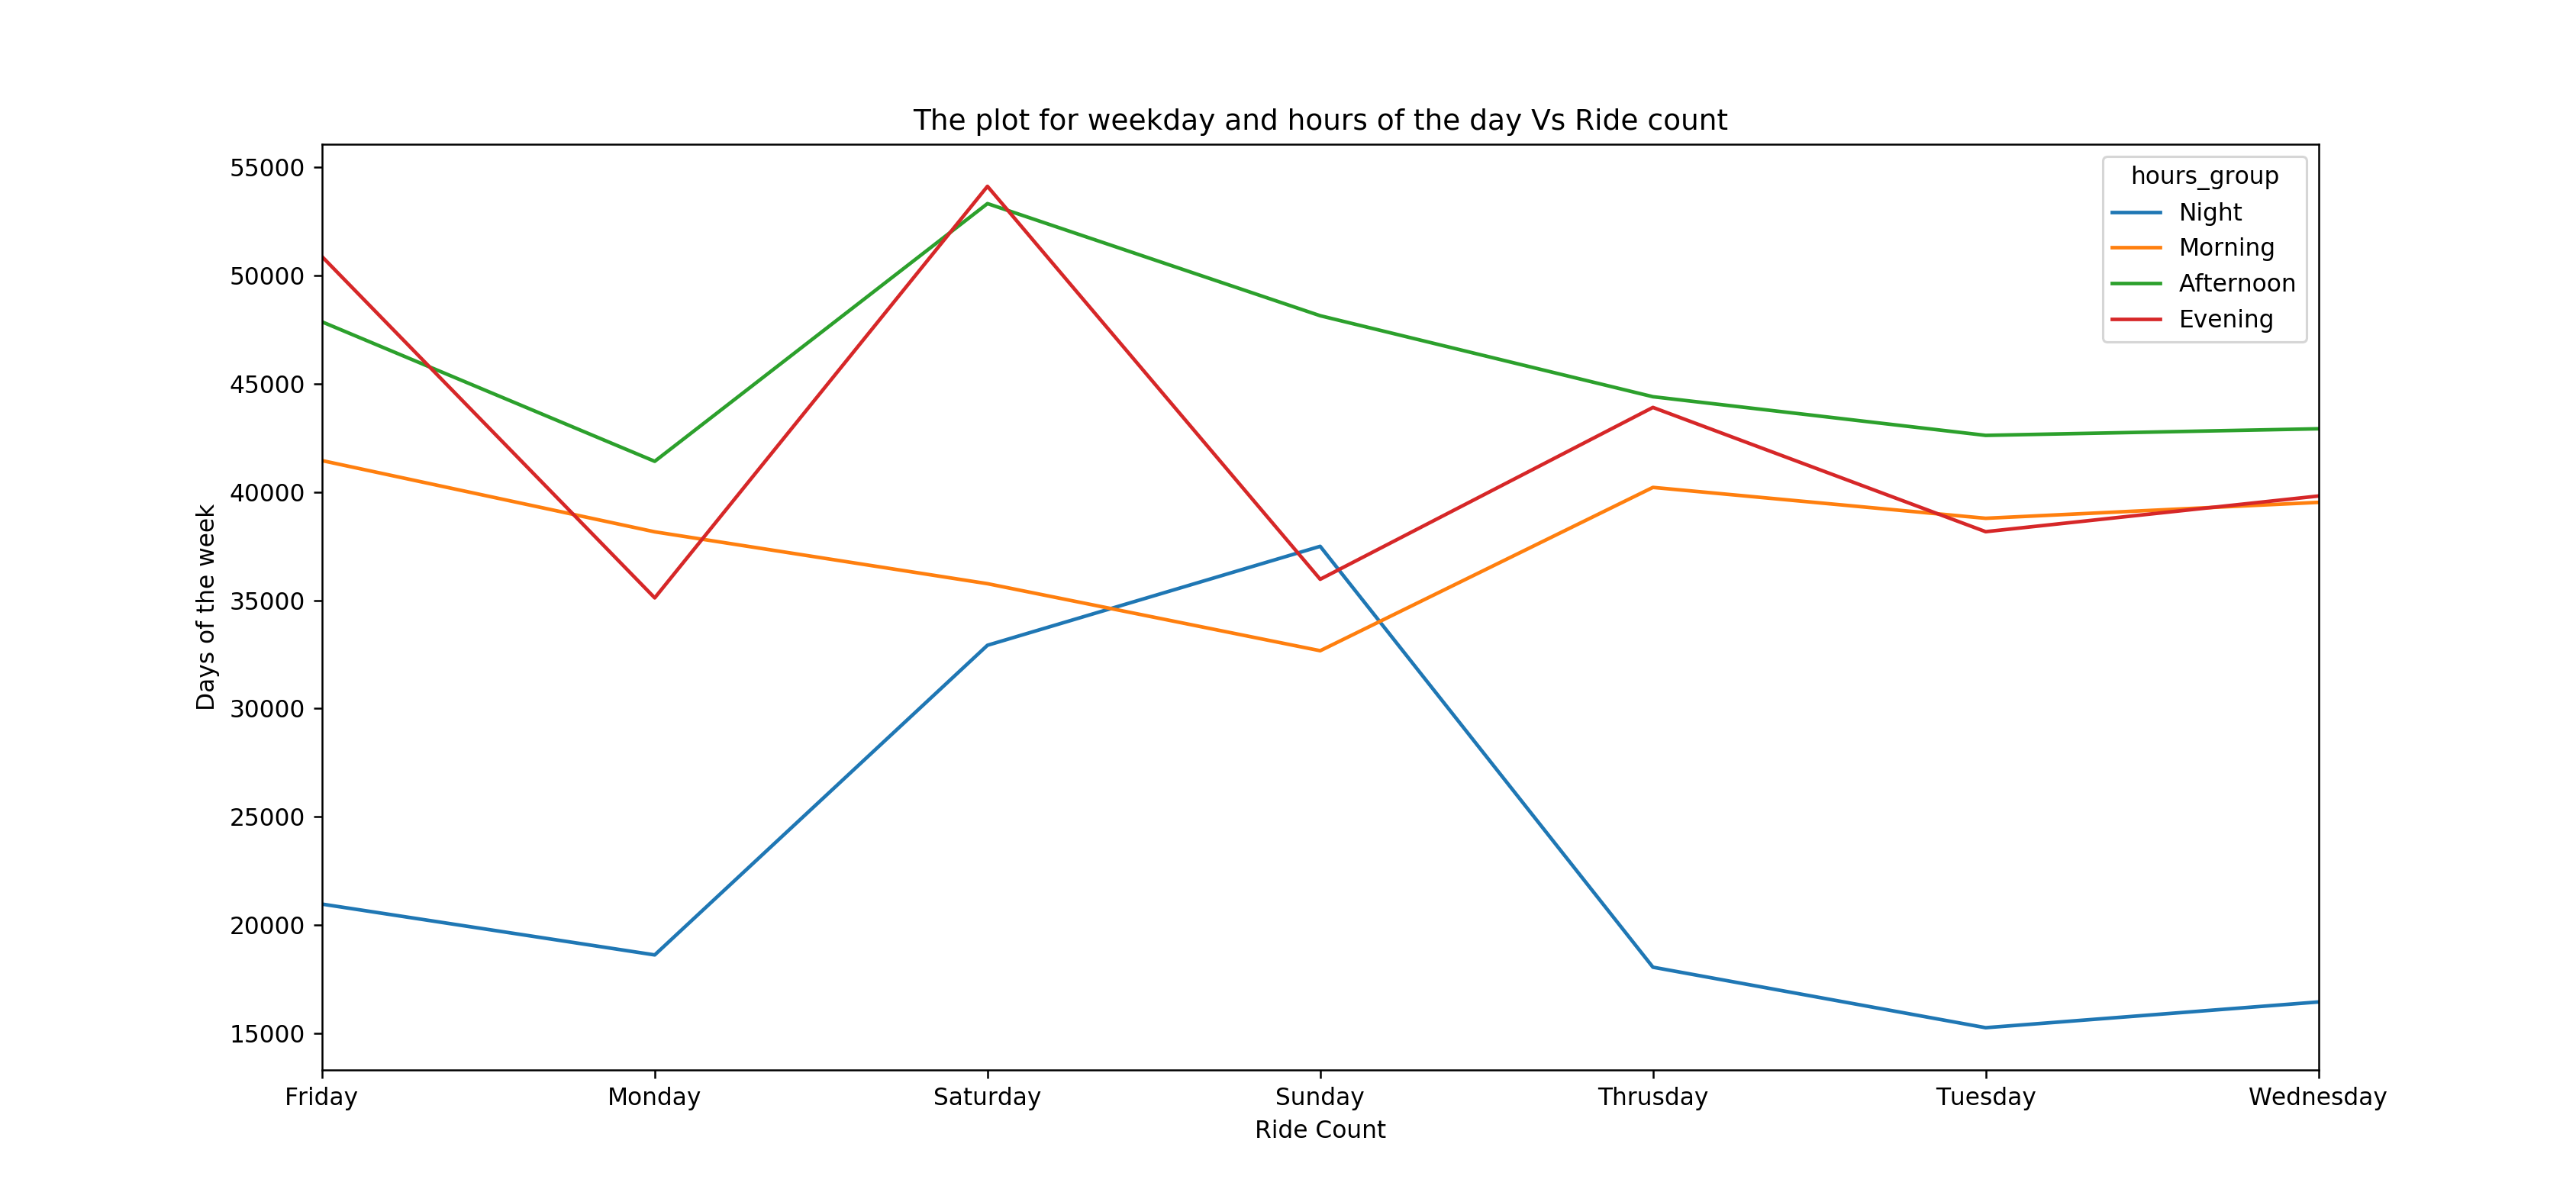

In [32]:
fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
src_df.groupby(['week_day_name','hours_group']).count()['Trip_Duration'].unstack().plot(ax=ax)

In [33]:
plt.title("The plot for weekday and hours of the day Vs Ride count")
plt.ylabel("Days of the week")
plt.xlabel("Ride Count")

Text(0.5, 107.87499999999997, 'Ride Count')

In [34]:
# Save an image of the chart and print it to the screen
plt.savefig("Stackedline_201801_weekday_hourgroups.png")
plt.show()

<IPython.core.display.Javascript object>


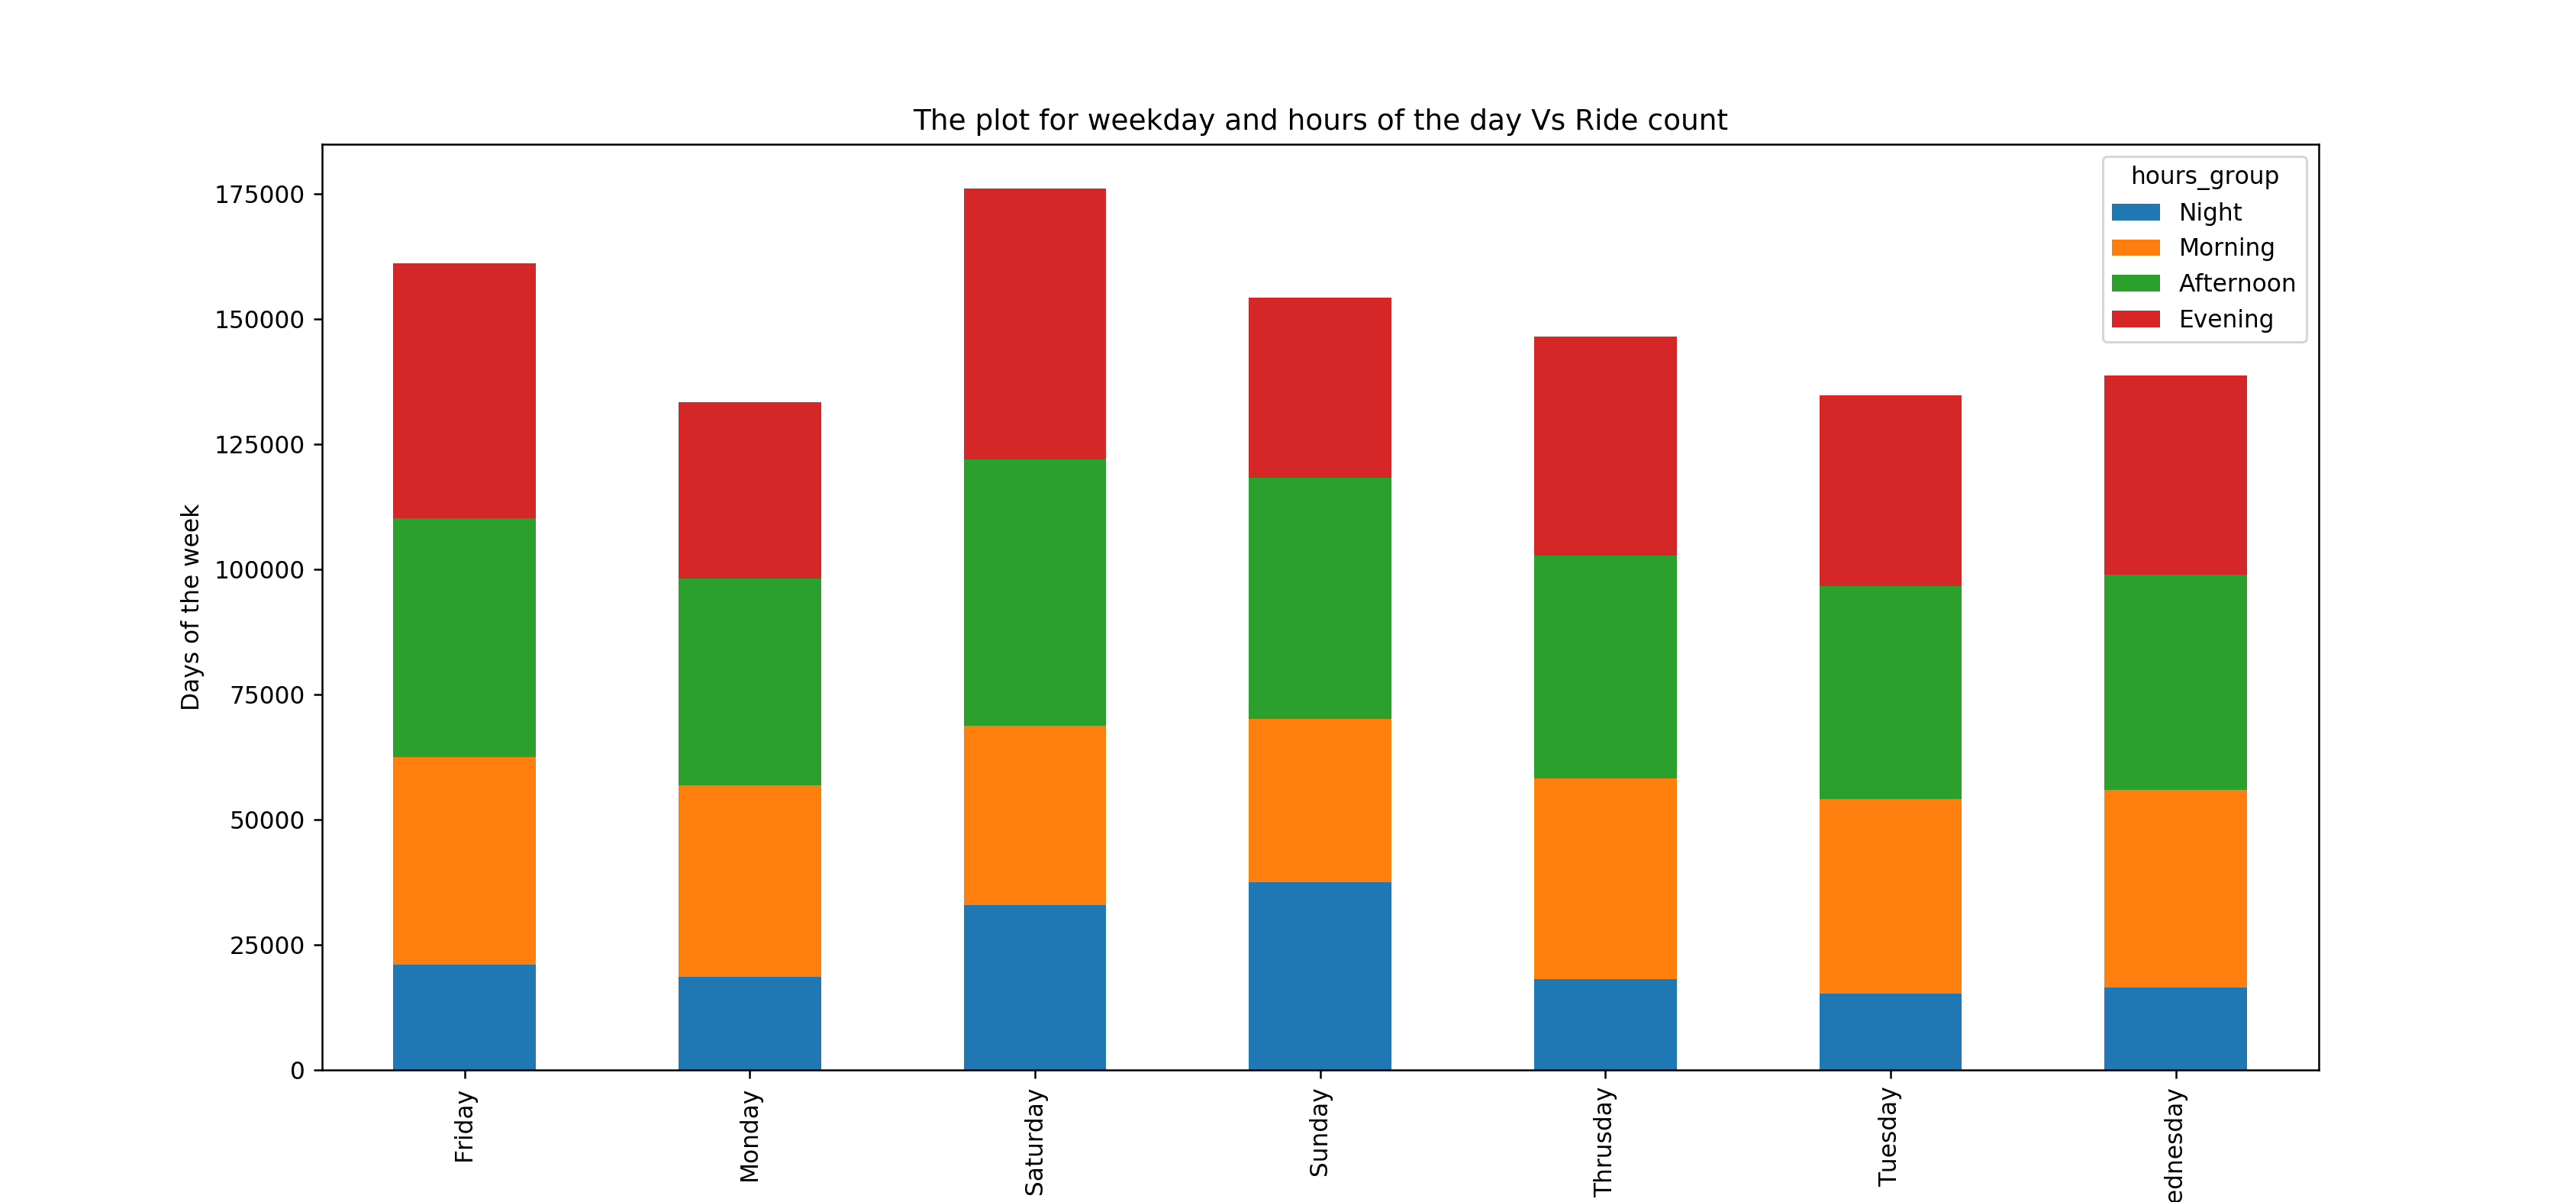

In [35]:
fig, ax = plt.subplots(figsize=(15,7))
src_df.groupby(['week_day_name','hours_group']).size().unstack().plot(kind='bar',stacked=True,ax=ax)


In [36]:
plt.title("The plot for weekday and hours of the day Vs Ride count")
plt.ylabel("Days of the week")
plt.xlabel("Ride Count")

Text(0.5, -43.98437500000003, 'Ride Count')

In [37]:
# Save an image of the chart and print it to the screen
plt.savefig("StackedBar_2018_weather_hourly_weekday.png")
plt.show()